In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(97)

In [2]:
saved_models_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/saved_DEN_models_v6_TITAN/"
jax_data_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/"

In [3]:
len(os.listdir(saved_models_dir))

234

In [4]:
all_configs = []
all_configs.append({
    "target_cell_exp_weight": {"THP1": 1.5, "Jurkat": 1.0, "K562": 1.15},
    "diversity_loss_coef": 1.0,
    "entropy_loss_coef": 1.0,
})
all_configs.append({
    "target_cell_exp_weight": {"THP1": 2, "Jurkat": 2, "K562": 2},
    "diversity_loss_coef": 1.0,
    "entropy_loss_coef": 1.0,
})
all_configs.append({
    "target_cell_exp_weight": {"THP1": 1.5, "Jurkat": 1.0, "K562": 1.15},
    "diversity_loss_coef": 5.0,
    "entropy_loss_coef": 5.0,
})
all_configs.append({
    "target_cell_exp_weight": {"THP1": 2, "Jurkat": 2, "K562": 2},
    "diversity_loss_coef": 5.0,
    "entropy_loss_coef": 5.0,
})
all_configs.append({
    "target_cell_exp_weight": {"THP1": 1.5, "Jurkat": 1.0, "K562": 1.15},
    "diversity_loss_coef": 10.0,
    "entropy_loss_coef": 10.0,
})
all_configs.append({
    "target_cell_exp_weight": {"THP1": 2, "Jurkat": 2, "K562": 2},
    "diversity_loss_coef": 10.0,
    "entropy_loss_coef": 10.0,
})

In [5]:
all_predicted_exps = {}
all_predicted_exps["designed_for"] = []
all_predicted_exps["sequence"] = []
all_predicted_exps["design_model"] = []
all_predicted_exps["target_cell_exp_weight"] = []
all_predicted_exps["diversity_loss_coef"] = []
all_predicted_exps["entropy_loss_coef"] = []

for cell in ["THP1", "Jurkat", "K562"]:
    all_predicted_exps[cell] = []

for model in sorted(os.listdir(os.path.join(jax_data_dir, "trained_predictors_after_normalization_and_opt_weight_adj"))):
    for diff_exp_cell_ind, cell in enumerate(["THP1", "Jurkat", "K562"]):
        for config in all_configs:
            target_cell_exp_weight = config["target_cell_exp_weight"][cell]
            diversity_loss_coef = config["diversity_loss_coef"]
            entropy_loss_coef = config["entropy_loss_coef"]

            experiment_id = f"{cell}_using_{model}_exp_weight_{target_cell_exp_weight}_div_coef_{diversity_loss_coef}_ent_coef_{entropy_loss_coef}"
            
            print(experiment_id)
            
            assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
            assert os.path.exists(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            
            final_sequences_predicted_exps = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences_predicted_exps.npy"))
            
            final_sequences = np.load(os.path.join(saved_models_dir, experiment_id, "final_sequences.npy"))
            final_sequences = np.argmax(final_sequences, axis=-1)
            final_sequences = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(final_sequences)
            
            all_predicted_exps["designed_for"].extend([cell]*len(final_sequences_predicted_exps))
            all_predicted_exps["sequence"].extend(final_sequences)
            all_predicted_exps["design_model"].extend([model]*len(final_sequences_predicted_exps))
            all_predicted_exps["target_cell_exp_weight"].extend([target_cell_exp_weight]*len(final_sequences_predicted_exps))
            all_predicted_exps["diversity_loss_coef"].extend([diversity_loss_coef]*len(final_sequences_predicted_exps))
            all_predicted_exps["entropy_loss_coef"].extend([entropy_loss_coef]*len(final_sequences_predicted_exps))
            
            for i, exp_cell in enumerate(["THP1", "Jurkat", "K562"]):
                all_predicted_exps[exp_cell].extend(final_sequences_predicted_exps[:, i])
                
all_predicted_exps = pd.DataFrame(all_predicted_exps)

THP1_using_coms_0.03_total_rounds_3_gd_steps_10_mutation_steps_10.pkl_exp_weight_1.5_div_coef_1.0_ent_coef_1.0
THP1_using_coms_0.03_total_rounds_3_gd_steps_10_mutation_steps_10.pkl_exp_weight_2_div_coef_1.0_ent_coef_1.0
THP1_using_coms_0.03_total_rounds_3_gd_steps_10_mutation_steps_10.pkl_exp_weight_1.5_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.03_total_rounds_3_gd_steps_10_mutation_steps_10.pkl_exp_weight_2_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.03_total_rounds_3_gd_steps_10_mutation_steps_10.pkl_exp_weight_1.5_div_coef_10.0_ent_coef_10.0
THP1_using_coms_0.03_total_rounds_3_gd_steps_10_mutation_steps_10.pkl_exp_weight_2_div_coef_10.0_ent_coef_10.0
Jurkat_using_coms_0.03_total_rounds_3_gd_steps_10_mutation_steps_10.pkl_exp_weight_1.0_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.03_total_rounds_3_gd_steps_10_mutation_steps_10.pkl_exp_weight_2_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.03_total_rounds_3_gd_steps_10_mutation_steps_10.pkl_exp_weight_1.0_div_coef_5.0_ent_coef_5.0

THP1_using_coms_0.0_total_rounds_5_gd_steps_10_mutation_steps_10.pkl_exp_weight_2_div_coef_5.0_ent_coef_5.0
THP1_using_coms_0.0_total_rounds_5_gd_steps_10_mutation_steps_10.pkl_exp_weight_1.5_div_coef_10.0_ent_coef_10.0
THP1_using_coms_0.0_total_rounds_5_gd_steps_10_mutation_steps_10.pkl_exp_weight_2_div_coef_10.0_ent_coef_10.0
Jurkat_using_coms_0.0_total_rounds_5_gd_steps_10_mutation_steps_10.pkl_exp_weight_1.0_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.0_total_rounds_5_gd_steps_10_mutation_steps_10.pkl_exp_weight_2_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.0_total_rounds_5_gd_steps_10_mutation_steps_10.pkl_exp_weight_1.0_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.0_total_rounds_5_gd_steps_10_mutation_steps_10.pkl_exp_weight_2_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.0_total_rounds_5_gd_steps_10_mutation_steps_10.pkl_exp_weight_1.0_div_coef_10.0_ent_coef_10.0
Jurkat_using_coms_0.0_total_rounds_5_gd_steps_10_mutation_steps_10.pkl_exp_weight_2_div_coef_10.0_ent_coef_10.0


Jurkat_using_coms_0.1_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_1.0_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.1_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_2_div_coef_1.0_ent_coef_1.0
Jurkat_using_coms_0.1_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_1.0_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.1_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_2_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.1_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_1.0_div_coef_10.0_ent_coef_10.0
Jurkat_using_coms_0.1_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_2_div_coef_10.0_ent_coef_10.0
K562_using_coms_0.1_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_1.15_div_coef_1.0_ent_coef_1.0
K562_using_coms_0.1_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_2_div_coef_1.0_ent_coef_1.0
K562_using_coms_0.1_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_1.15_div_coef_5.0_ent_coef_5.0
K562_using_coms_0.

Jurkat_using_coms_0.3_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_2_div_coef_5.0_ent_coef_5.0
Jurkat_using_coms_0.3_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_1.0_div_coef_10.0_ent_coef_10.0
Jurkat_using_coms_0.3_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_2_div_coef_10.0_ent_coef_10.0
K562_using_coms_0.3_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_1.15_div_coef_1.0_ent_coef_1.0
K562_using_coms_0.3_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_2_div_coef_1.0_ent_coef_1.0
K562_using_coms_0.3_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_1.15_div_coef_5.0_ent_coef_5.0
K562_using_coms_0.3_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_2_div_coef_5.0_ent_coef_5.0
K562_using_coms_0.3_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_1.15_div_coef_10.0_ent_coef_10.0
K562_using_coms_0.3_total_rounds_5_gd_steps_5_mutation_steps_5.pkl_exp_weight_2_div_coef_10.0_ent_coef_10.0


In [10]:
all_predicted_exps["sequence"] = all_predicted_exps.apply(lambda x: "".join(x["sequence"]), axis=1)

In [11]:
all_predicted_exps

,designed_for,sequence,design_model,target_cell_exp_weight,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562
0,THP1,CGACGCCAACCGAGGAAACGGAAGCAGAAGCAGAAGCAGAAGCGAA...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.629622,0.379506,0.336685
1,THP1,CGACGCCAACCGAGGAAGCGGAAGCAGAAGCAGAAGCAGAAGCAGA...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.687961,0.559623,0.479022
2,THP1,CGACGCCAACCGAGGAAACCGAAGCGGAAGCAGAAGCTGAAGCAGA...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.599566,0.389701,0.326611
3,THP1,CGACGCCAACCGAGGAAACGGAAGCAGAAGCAGAAGCAGAAGCAGA...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.664889,0.414526,0.354171
4,THP1,CGACGCCAACCGAGGAAACAGAAGGAAACGGAAGCAGAAGCAGAAG...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.853674,0.618269,0.605900
...,...,...,...,...,...,...,...,...,...
4679995,K562,GGGGGGCGTGTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.676364,0.917514,1.550400
4679996,K562,GCCCCTTTTCTTTTGGGGGGGGGGGGGGGGGGGGGGGGGCCCCTTT...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.615660,0.885715,1.572785
4679997,K562,TTTTTTGGGGGGGGGGGGGGGGCGGGACCCCCTTTTTTTTTTTTTT...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.583300,0.760906,1.487105
4679998,K562,GCGCCTTCTTTTTCGGGGGGGGGGGGGGGGCGGGGGGGCGGGGCGC...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.738684,1.216584,1.762630


THP1


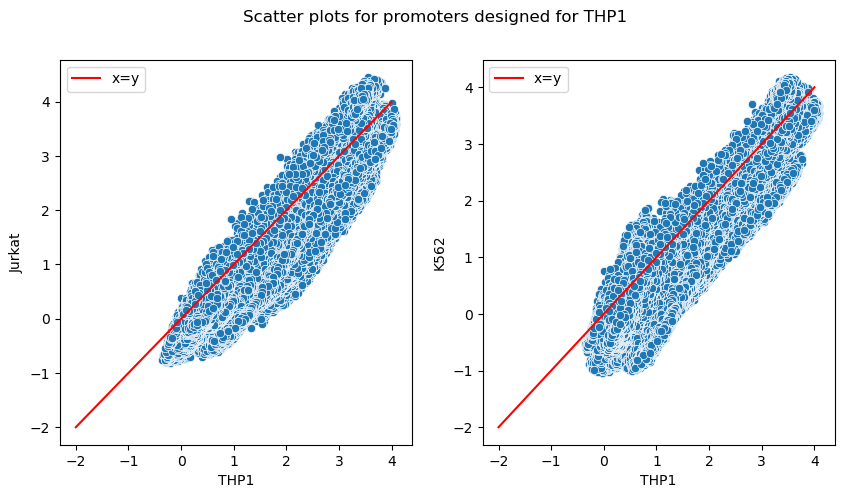

Jurkat


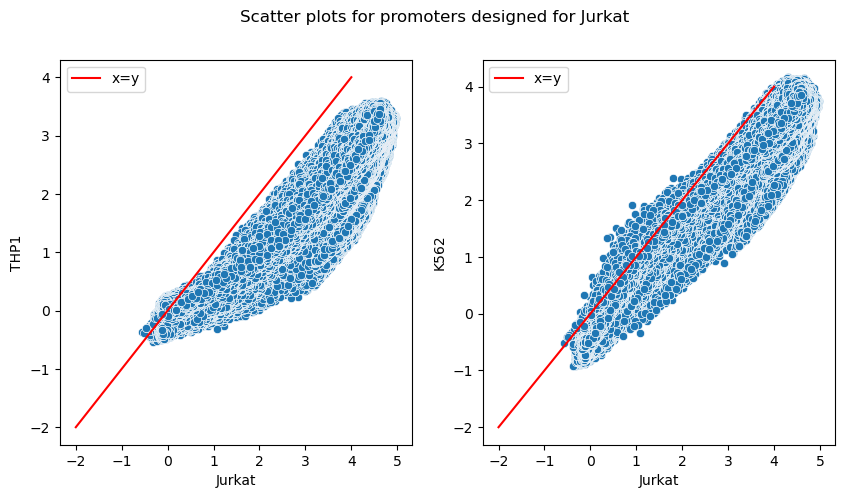

K562


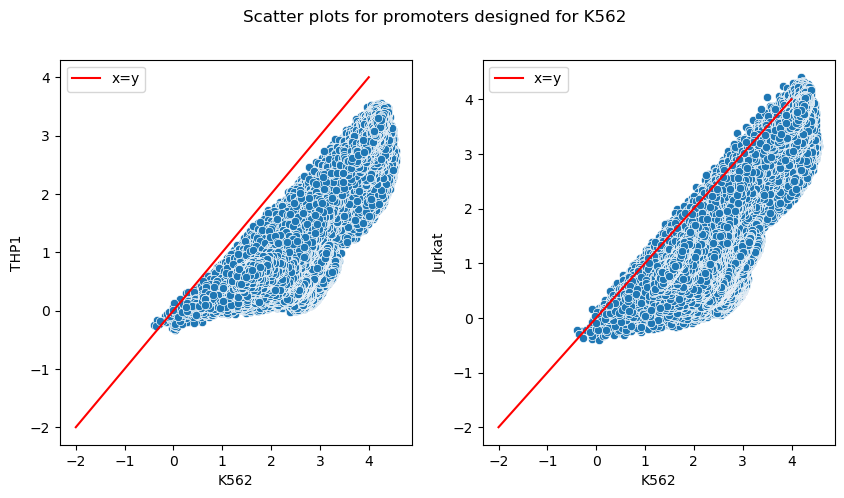

In [12]:
for cell in ["THP1", "Jurkat", "K562"]:
    print(cell)
    other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    for j, other_cell in enumerate(other_cells):
        sns.scatterplot(data=all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True), \
                        x=cell,
                        y=other_cell, \
                        ax=ax[j])
        ax[j].plot(np.linspace(-2, 4, 10), np.linspace(-2, 4, 10), color="r", label="x=y")
        ax[j].legend()
    fig.suptitle(f"Scatter plots for promoters designed for {cell}")
    plt.show()

In [13]:
# for cell in ["THP1", "Jurkat", "K562"]:
cell = "THP1"
print(cell)
other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]

seqs_designed_for_cell = all_predicted_exps[all_predicted_exps["designed_for"] == cell].reset_index(drop=True)
seqs_designed_for_cell["max_diff"] = seqs_designed_for_cell[cell] - np.max(seqs_designed_for_cell[other_cells], axis=1)
seqs_designed_for_cell = seqs_designed_for_cell.sort_values(by="max_diff", ascending=False)

THP1


In [14]:
seqs_designed_for_cell

,designed_for,sequence,design_model,target_cell_exp_weight,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562,max_diff
134690,THP1,CCTGCCGTTTCTTTCTCCCGAAACGGAAGCAGAAGCAGAAGCAAGA...,coms_0.03_total_rounds_3_gd_steps_3_mutation_s...,1.5,1.0,1.0,1.905259,0.457666,0.459388,1.445871
135305,THP1,CCTGCCGTTTCTTTCTCCCAACGGAAGCACGGAAGCAGAAGCAGAA...,coms_0.03_total_rounds_3_gd_steps_3_mutation_s...,1.5,1.0,1.0,1.708607,0.265185,0.242883,1.443422
126301,THP1,CCTGCCGTTTCCTTGTCCCGAAACGGAAGCAGAAGCAGAAGCAGAA...,coms_0.03_total_rounds_3_gd_steps_3_mutation_s...,1.5,1.0,1.0,1.669206,0.196529,0.229256,1.439950
121000,THP1,CCAGCCGTTTCTTTGTCCCAGGAAGGAAACGGAAGCAGAAGCAGAA...,coms_0.03_total_rounds_3_gd_steps_3_mutation_s...,1.5,1.0,1.0,1.880182,0.462113,0.462961,1.417221
121727,THP1,CCTGCCGTTTCTTTTTCCCGAAACGGAAGCAGAAGCAGAAGCAGAA...,coms_0.03_total_rounds_3_gd_steps_3_mutation_s...,1.5,1.0,1.0,1.729585,0.231888,0.312444,1.417141
...,...,...,...,...,...,...,...,...,...,...
835687,THP1,CCCCCCCCCCCCCCTCCTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,coms_0.1_total_rounds_3_gd_steps_3_mutation_st...,2.0,10.0,10.0,0.525118,0.287645,1.560385,-1.035267
705572,THP1,CCCGCCCCCGGCCGGCCCCCGGAGCCCCGTTTCCCTGTCCCGTCGC...,coms_0.1_total_rounds_3_gd_steps_10_mutation_s...,2.0,10.0,10.0,3.111786,4.149931,3.755414,-1.038145
1553096,THP1,CCCCCCCCCCCCGCAGCAGCGGGGGGGGGGGGGGGGGGGGCCAGCT...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.790957,0.892833,1.836739,-1.045782
1541010,THP1,CCCCCCCCCCCCCCCCCCAGCTGCCGGCGGCGGGGGGGGGGAGGGG...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.471218,0.600389,1.530375,-1.059157


In [15]:
all_predicted_exps.to_parquet(os.path.join(jax_data_dir, "final_sequences_v6.parquet"), index=False)